# Chicago Crime Rate Prediction using FBProphet

## Import Libraries

In [5]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
%matplotlib inline

## Import Data

In [14]:
pd.pandas.set_option('display.max_columns', None)

In [17]:
data1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False, low_memory=False)
data2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False, low_memory=False)
data3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False, low_memory=False)
data4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False, low_memory=False)

C:\Users\Eashan\anaconda3\envs\ds\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [18]:
dataset = pd.concat([data1, data2, data3, data4], axis=0)

In [20]:
dataset.head()

Unnamed: 0       ID Case Number                    Date  \
0         879  4786321    HM399414  01/01/2004 12:01:00 AM   
1        2544  4676906    HM278933  03/01/2003 12:00:00 AM   
2        2919  4789749    HM402220  06/20/2004 11:00:00 AM   
3        2927  4789765    HM402058  12/30/2004 08:00:00 PM   
4        3302  4677901    HM275615  05/01/2003 01:00:00 AM   

                 Block  IUCR                Primary Type  \
0    082XX S COLES AVE  0840                       THEFT   
1      004XX W 42ND PL  2825               OTHER OFFENSE   
2  025XX N KIMBALL AVE  1752  OFFENSE INVOLVING CHILDREN   
3   045XX W MONTANA ST  0840                       THEFT   
4   111XX S NORMAL AVE  0841                       THEFT   

                      Description Location Description  Arrest  Domestic  \
0   FINANCIAL ID THEFT: OVER $300            RESIDENCE   False     False   
1         HARASSMENT BY TELEPHONE            RESIDENCE   False      True   
2   AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   False     False   
3   FINANCIAL ID THEFT: OVER $300                OTHER   False     False   
4  FINANCIAL ID THEFT:$300 &UNDER            RESIDENCE   False     False   

   Beat  District  Ward  Community Area FBI Code  X Coordinate Y Coordinate  \
0   424       4.0   7.0            46.0       06           NaN          NaN   
1   935       9.0  11.0            61.0       26     1173974.0    1876757.0   
2  1413      14.0  35.0            22.0       20           NaN          NaN   
3  2521      25.0  31.0            20.0       06           NaN          NaN   
4  2233      22.0  34.0            49.0       06     1174948.0    1831051.0   

     Year              Updated On      Latitude  Longitude  \
0  2004.0  08/17/2015 03:03:40 PM           NaN        NaN   
1  2003.0  04/15/2016 08:55:02 AM  41.817229156 -87.637328   
2  2004.0  08/17/2015 03:03:40 PM           NaN        NaN   
3  2004.0  08/17/2015 03:03:40 PM           NaN        NaN   
4  2003.0  04/15/2016 08:55:02 AM  41.691784636 -87.635116   

                        Location  
0                            NaN  
1  (41.817229156, -87.637328162)  
2                            NaN  
3                            NaN  
4  (41.691784636, -87.635115968)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

In [122]:
data = dataset.copy()

## Exploratory Data Analysis

In [123]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [124]:
data.set_index('ID', inplace=True)

In [125]:
data['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [126]:
data['Block'].nunique()

58776

In [127]:
data['IUCR'].nunique()

398

In [128]:
data['Description'].nunique()

376

In [129]:
data['Location Description'].nunique()

172

In [130]:
data['Beat'].nunique()

304

### Missing Values

<AxesSubplot:ylabel='ID'>

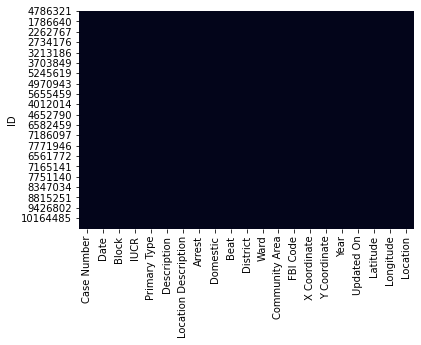

In [143]:
plt.figure(figsize=(12,12))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [132]:
data[['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location']] = data[['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location']].fillna(0)

In [133]:
data.loc[data[data.Latitude=='(41.789832136, -87.672973835)'].index, 'Latitude'] = 41.789832136

In [134]:
data['Latitude'] = data['Latitude'].astype(float)

In [135]:
data['Case Number'] = data['Case Number'].fillna('Missing')

In [136]:
data['District'] = data['District'].fillna(data.District.median())

In [137]:
data['Location Description'] = data['Location Description'].fillna('Missing')

In [138]:
data['Community Area'] = data['Community Area'].fillna('Missing')

In [139]:
data['Ward'] = data['Ward'].fillna('Missing')

In [145]:
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')

In [146]:
data.to_csv('complete_data.csv', index=False)

## Data Visualization

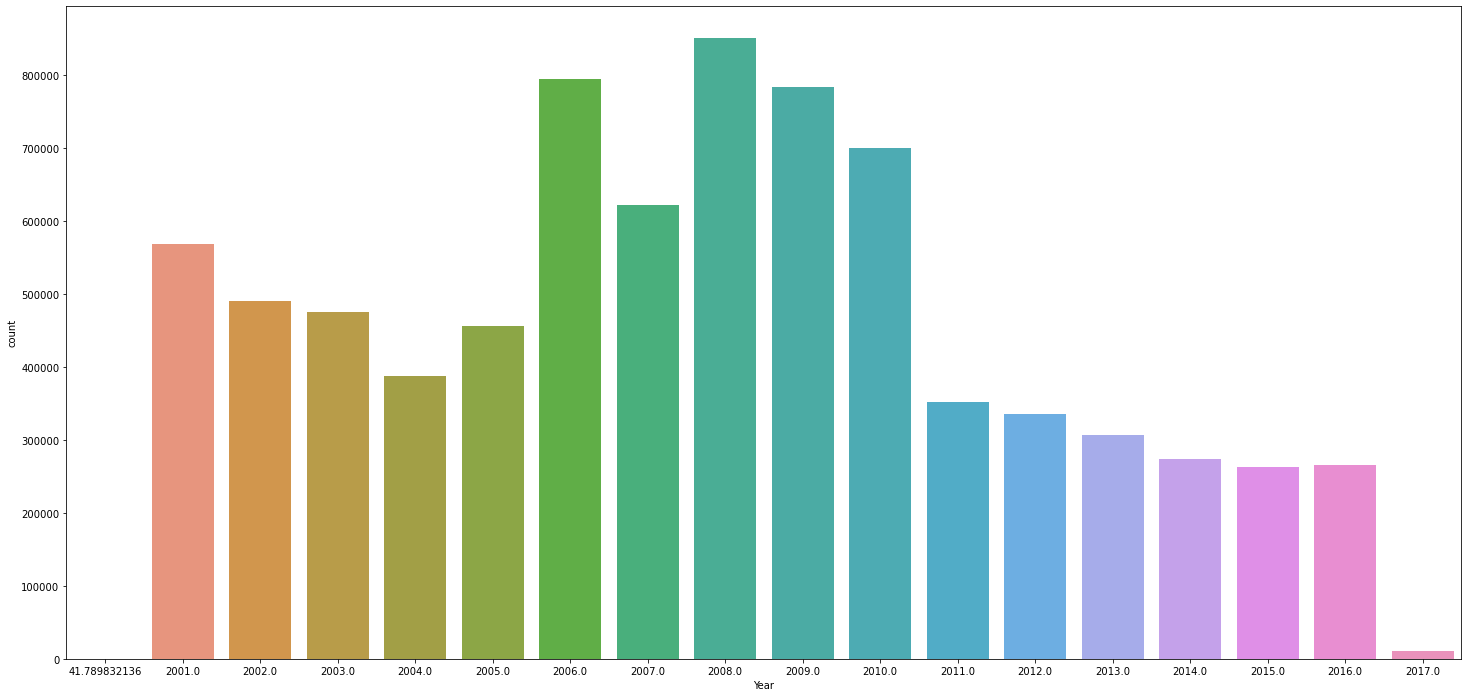

In [41]:
plt.figure(figsize=(25,12))
sns.countplot(x='Year', data=data)
plt.show()

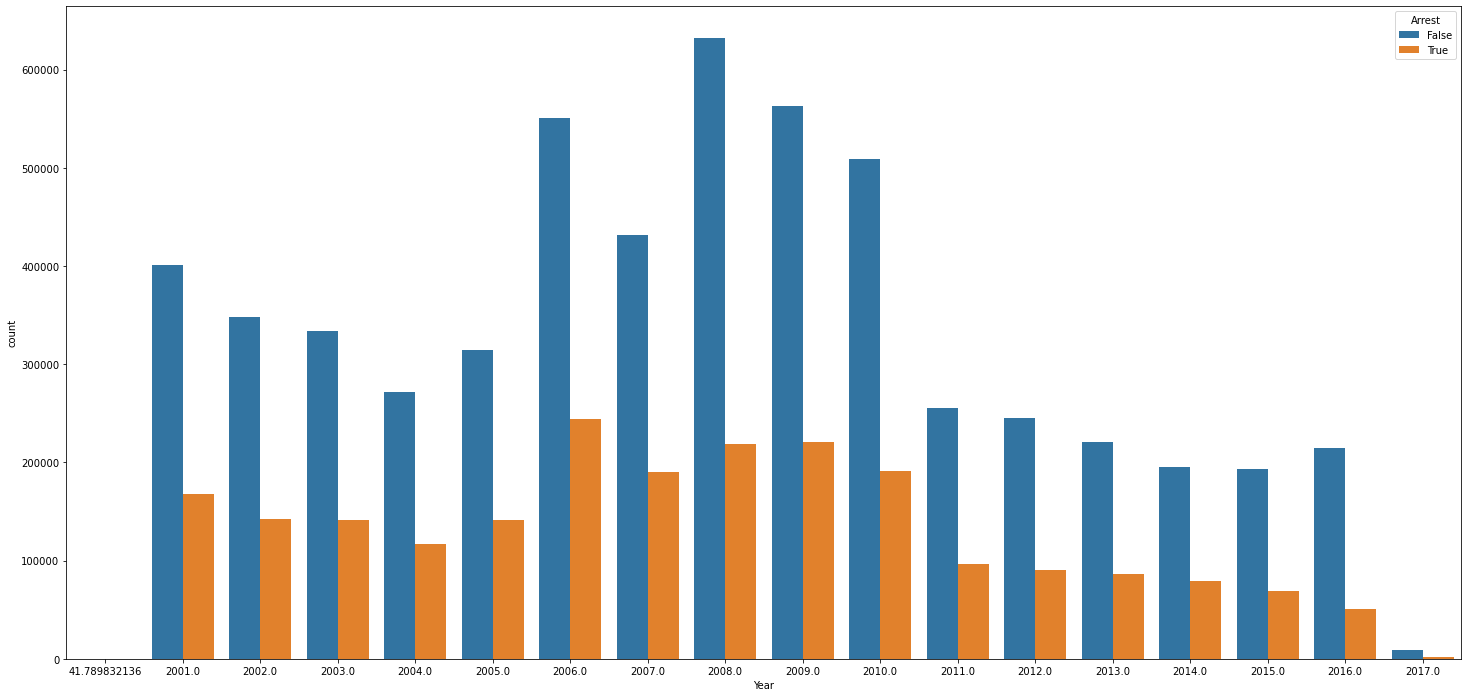

In [117]:
plt.figure(figsize=(25,12))
sns.countplot(x='Year', data=data, hue='Arrest')
plt.show()

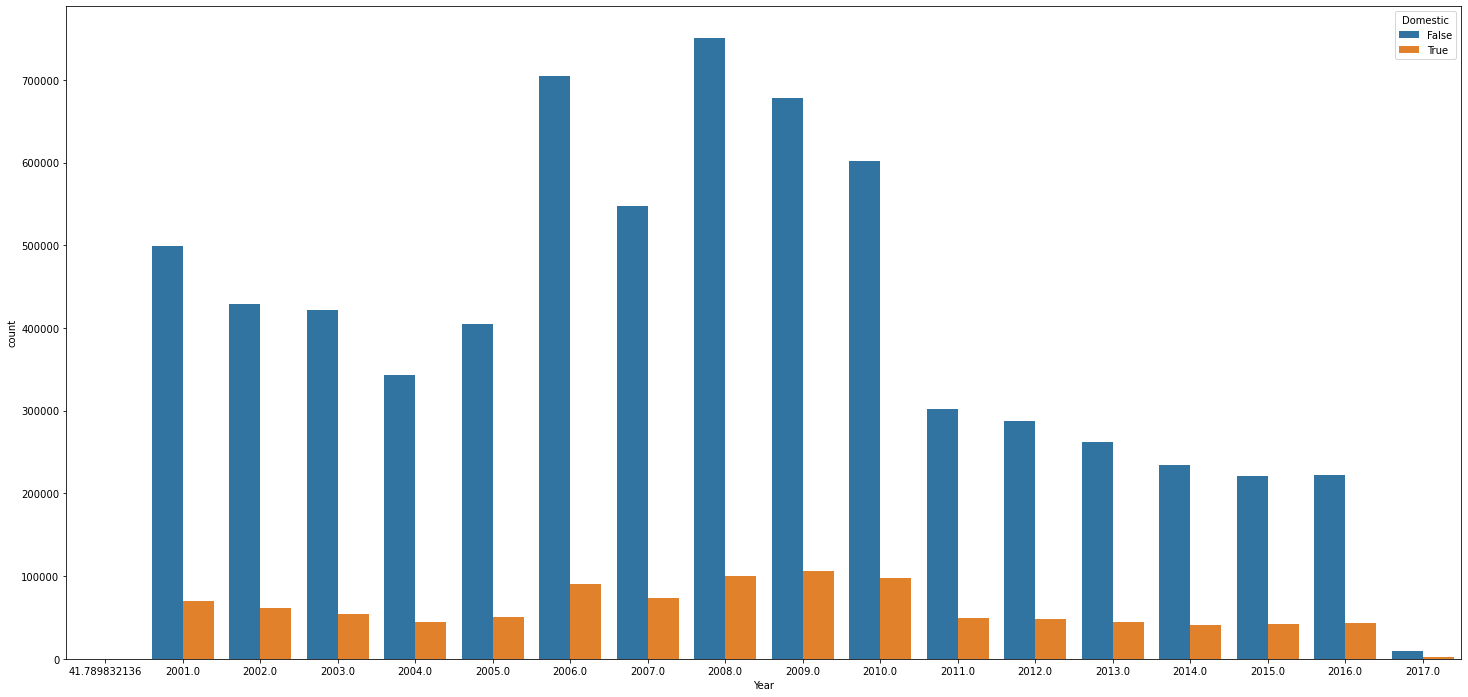

In [118]:
plt.figure(figsize=(25,12))
sns.countplot(x='Year', data=data, hue='Domestic')
plt.show()

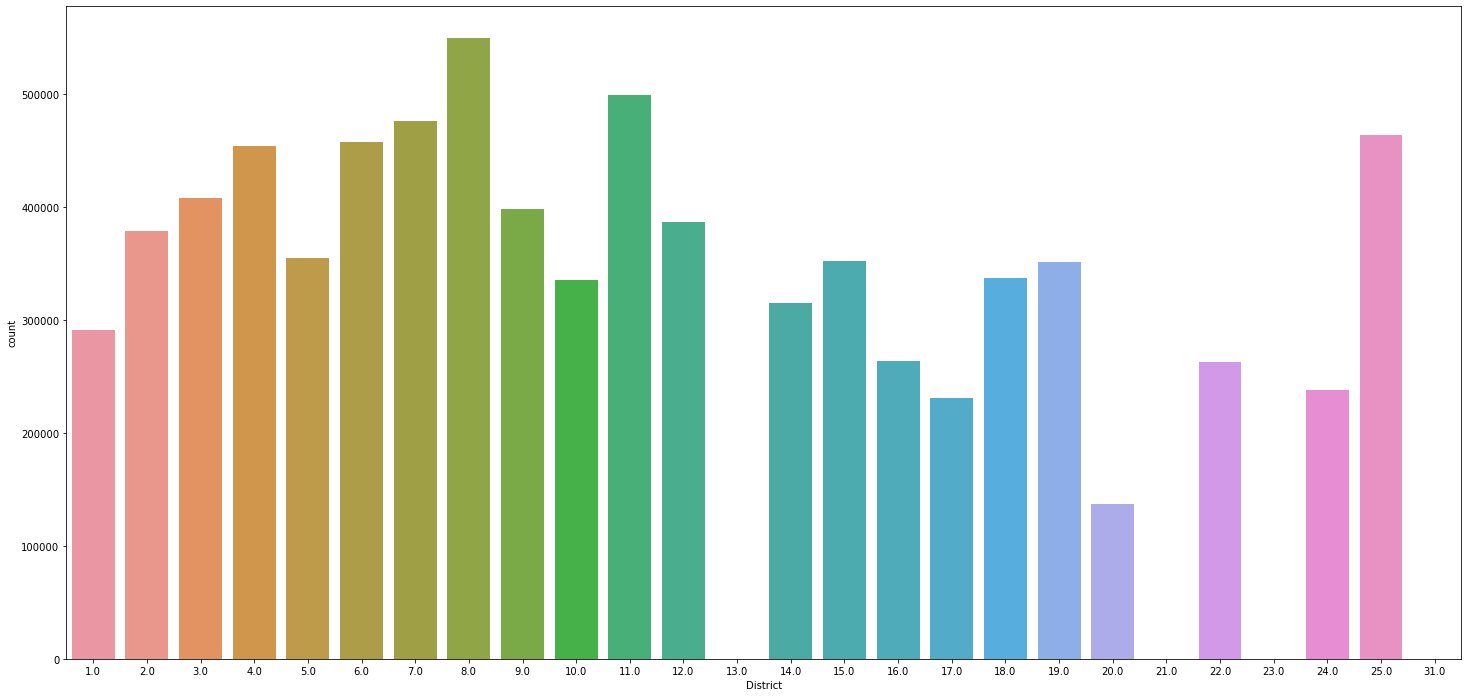

In [42]:
plt.figure(figsize=(25,12))
sns.countplot(x='District', data=data)
plt.show()

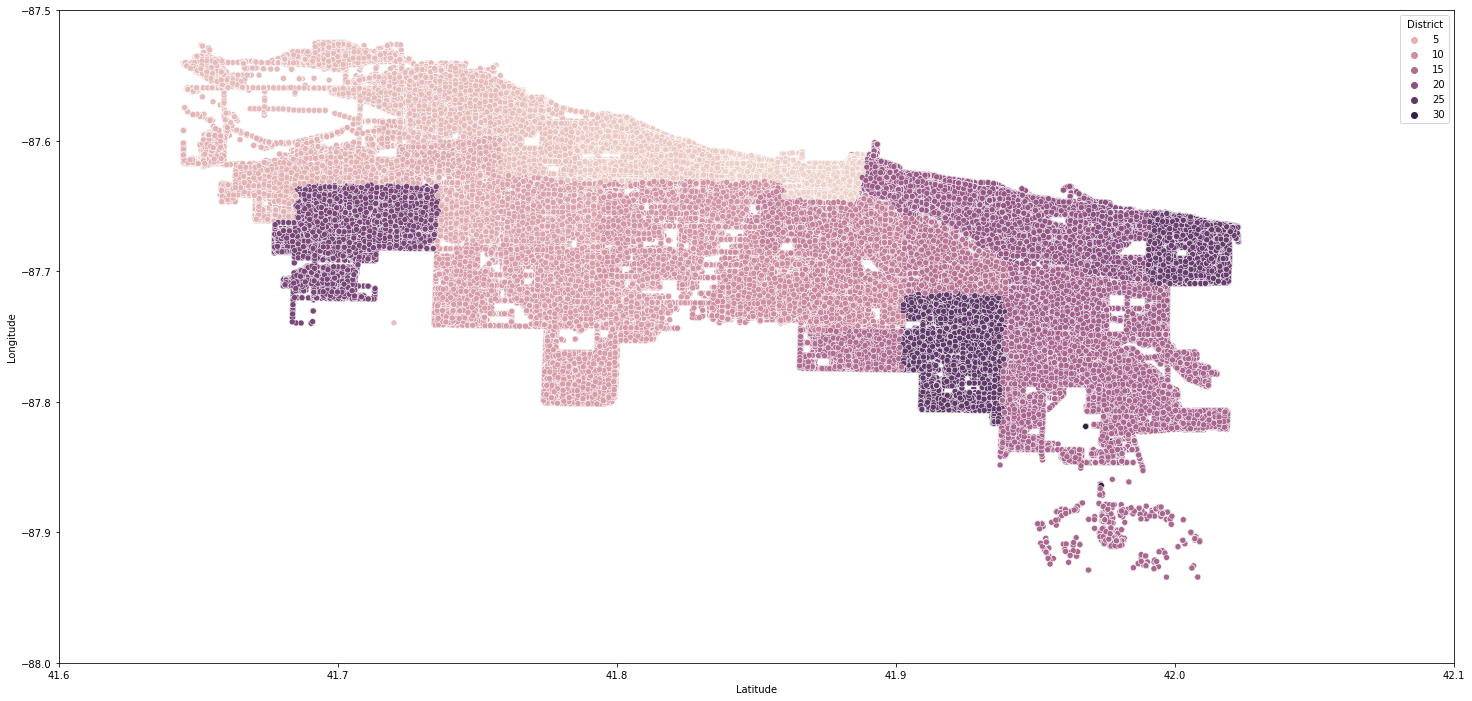

In [78]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='Latitude', y='Longitude', data=data, hue='District')
plt.xlim(41.6,42.1)
plt.ylim(-88,-87.50)
plt.show()

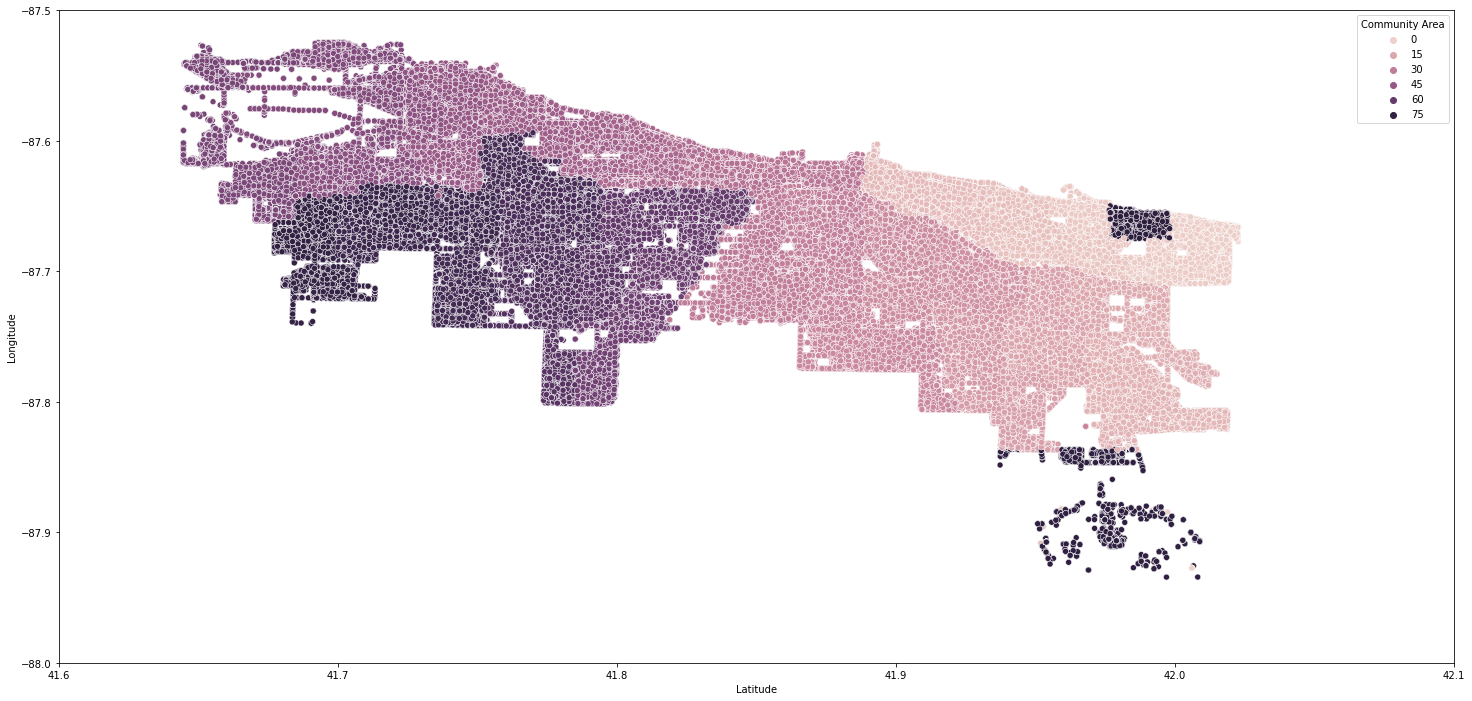

In [110]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='Latitude', y='Longitude', data=data, hue='Community Area')
plt.xlim(41.6,42.1)
plt.ylim(-88,-87.50)
plt.show()

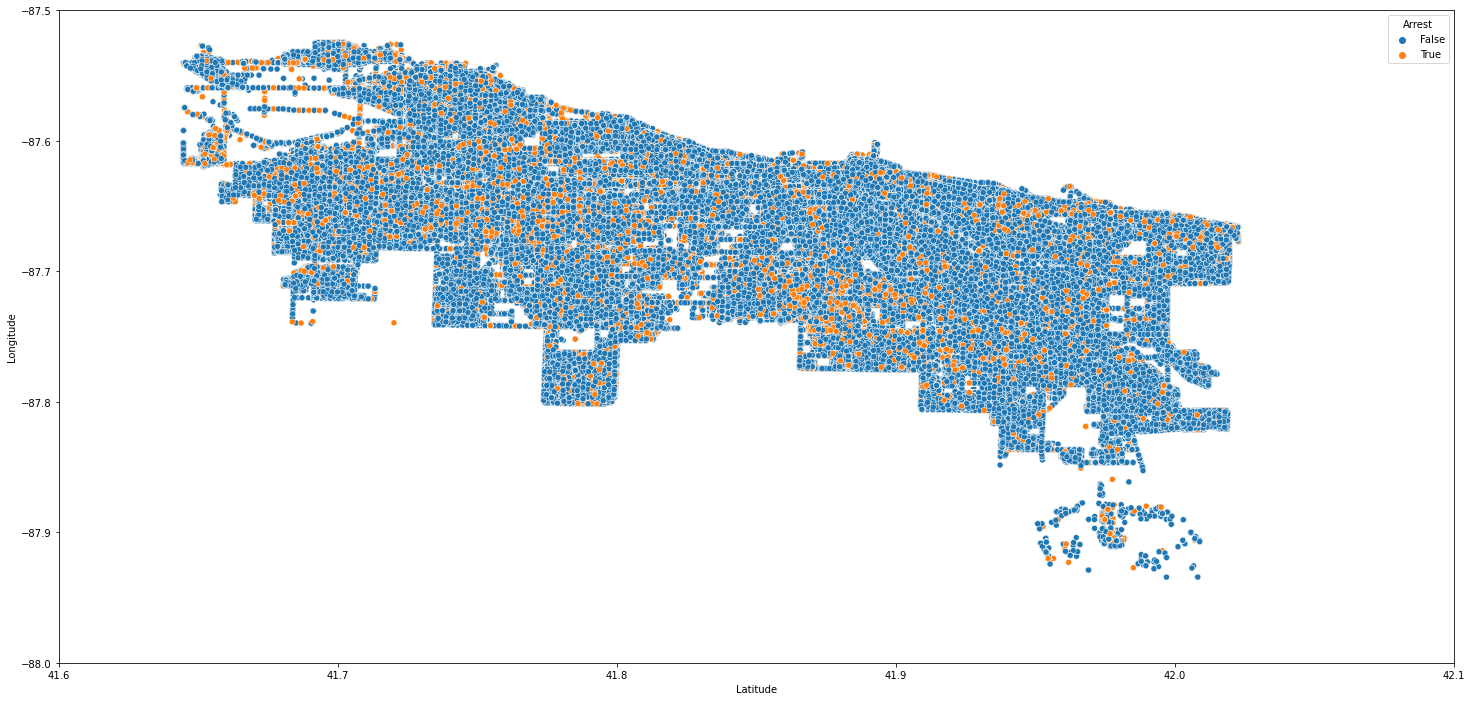

In [114]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='Latitude', y='Longitude', data=data, hue='Arrest')
plt.xlim(41.6,42.1)
plt.ylim(-88,-87.50)
plt.show()

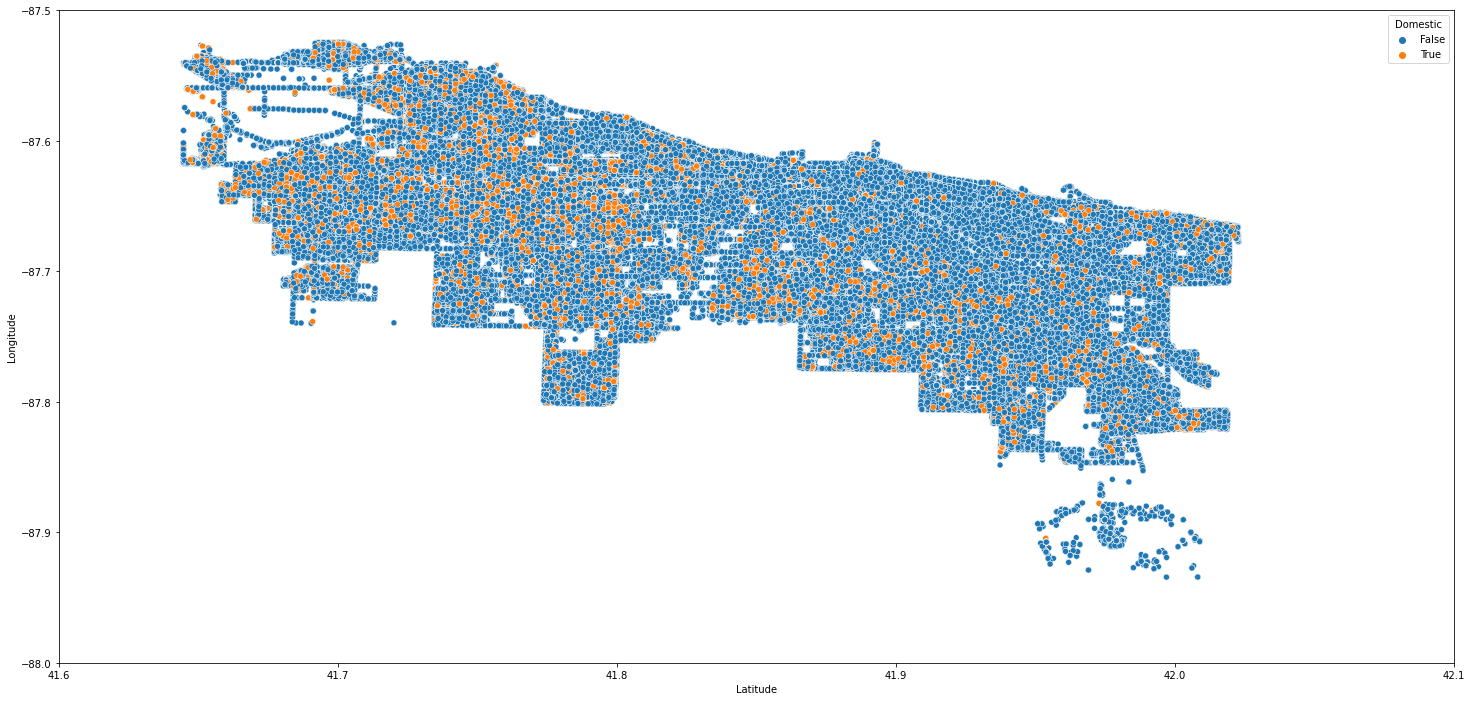

In [115]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='Latitude', y='Longitude', data=data, hue='Domestic')
plt.xlim(41.6,42.1)
plt.ylim(-88,-87.50)
plt.show()

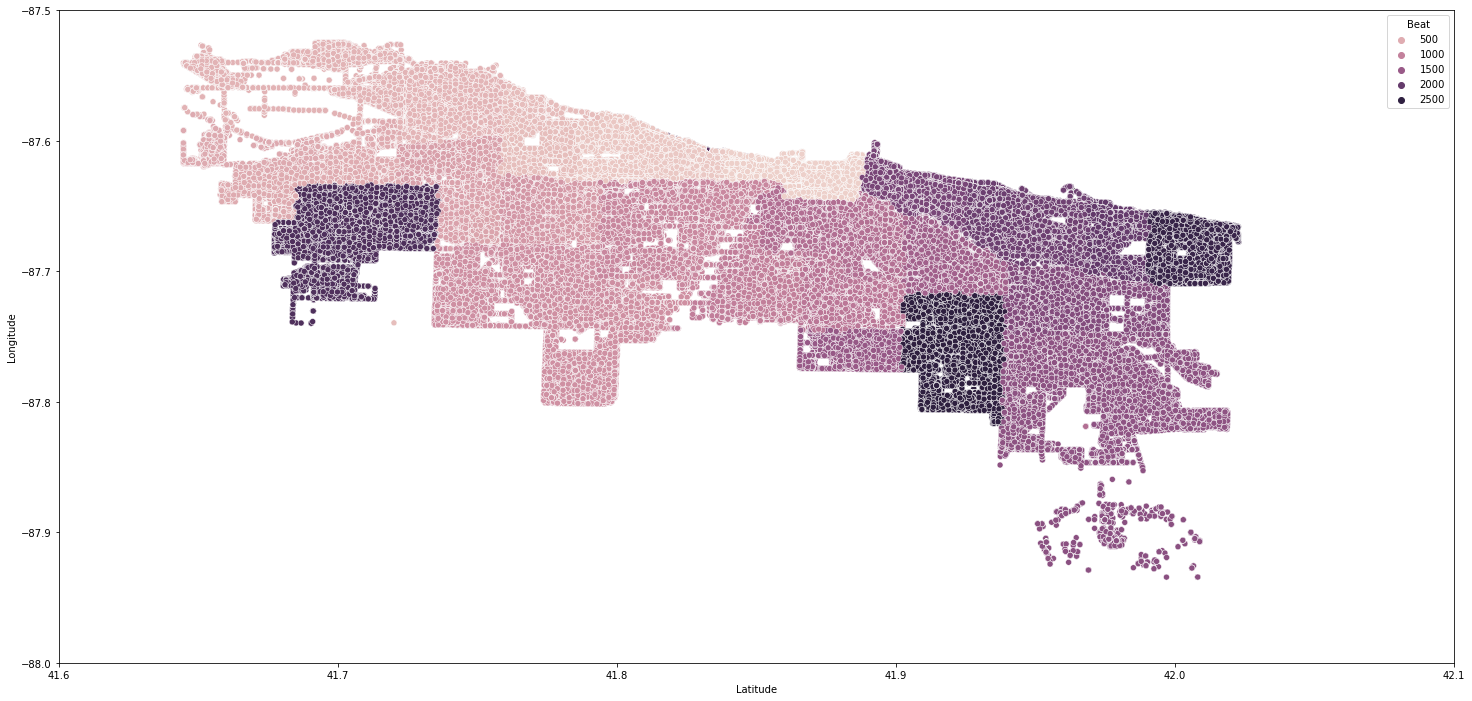

In [116]:
plt.figure(figsize=(25,12))
sns.scatterplot(x='Latitude', y='Longitude', data=data, hue='Beat')
plt.xlim(41.6,42.1)
plt.ylim(-88,-87.50)
plt.show()

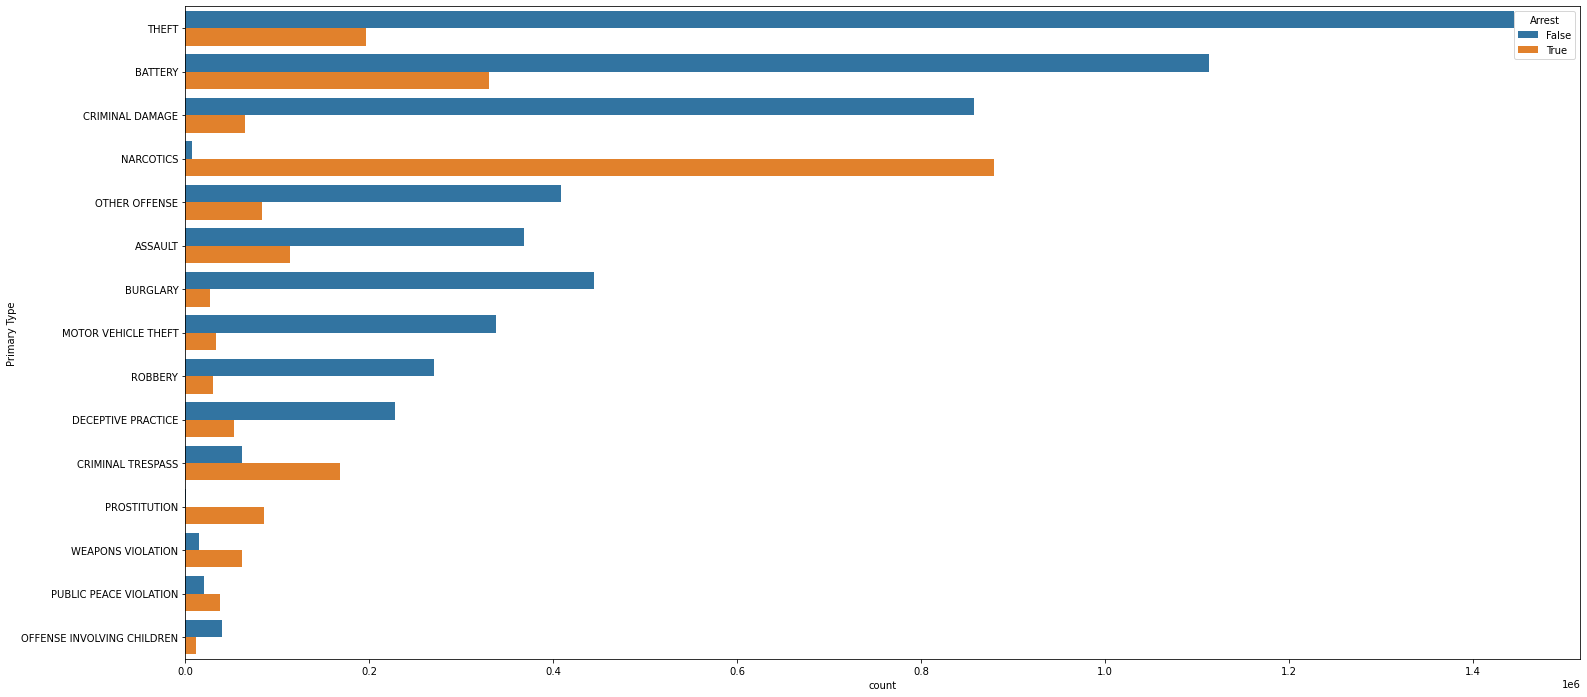

In [153]:
plt.figure(figsize=(25,12))
sns.countplot(y='Primary Type', data=data, order=data['Primary Type'].value_counts().iloc[:15].index, hue='Arrest')
plt.show()

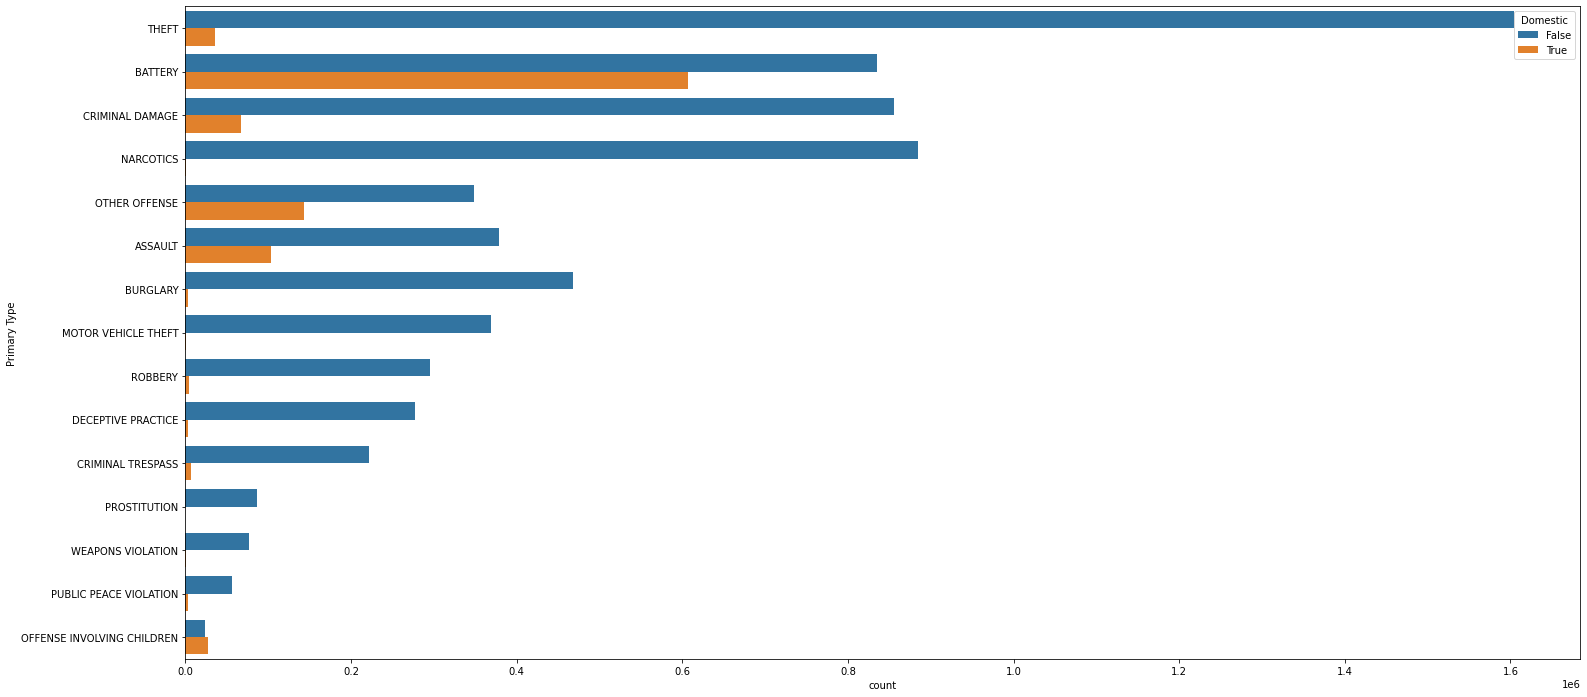

In [154]:
plt.figure(figsize=(25,12))
sns.countplot(y='Primary Type', data=data, order=data['Primary Type'].value_counts().iloc[:15].index, hue='Domestic')
plt.show()

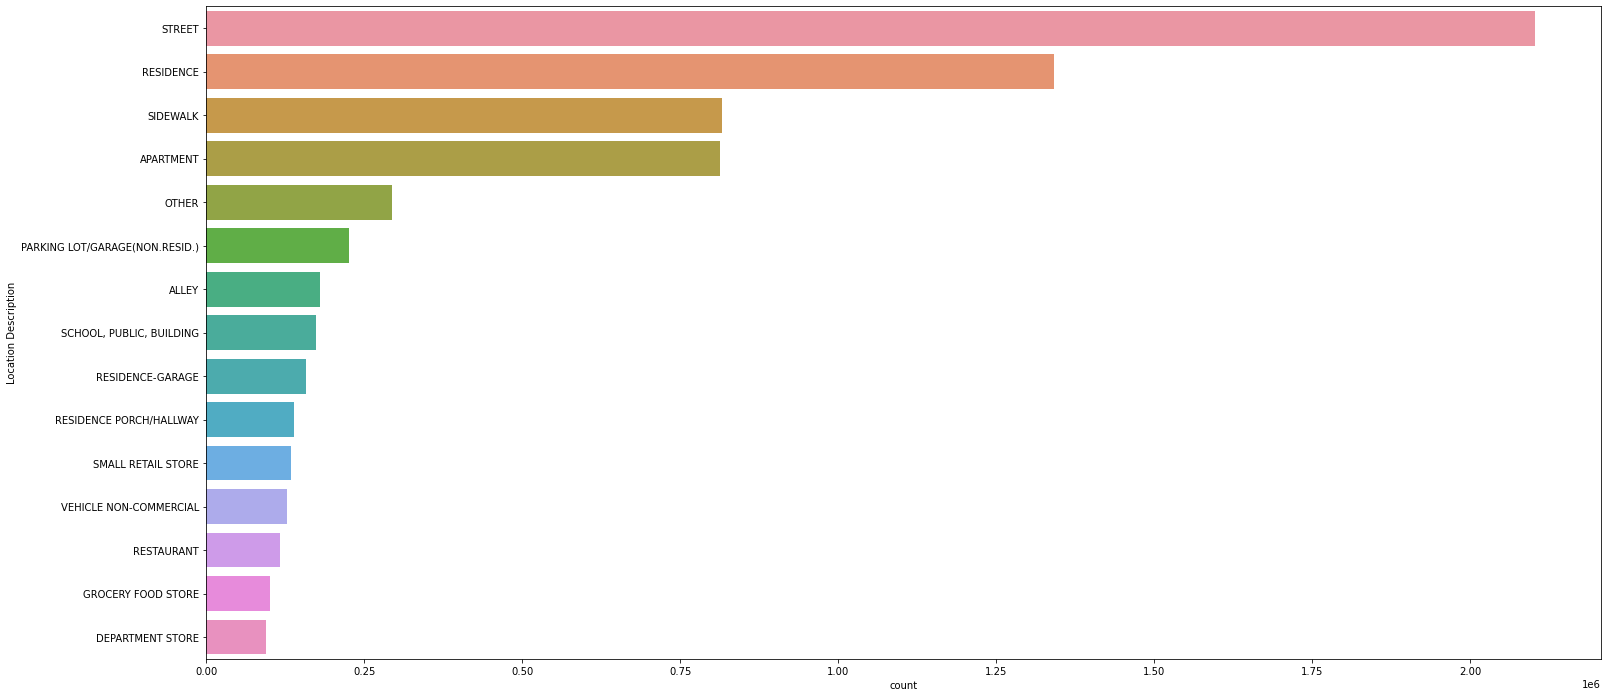

In [155]:
plt.figure(figsize=(25,12))
sns.countplot(y='Location Description', data=data, order=data['Location Description'].value_counts().iloc[:15].index)
plt.show()

In [157]:
data_datetime = data.set_index('Date')

In [160]:
data_datetime.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

## Data Preperation

In [147]:
df = data.drop(['Case Number', 'IUCR'])

Case Number                Date                 Block  IUCR  \
ID                                                                     
4786321     HM399414 2004-01-01 00:01:00     082XX S COLES AVE  0840   
4676906     HM278933 2003-03-01 00:00:00       004XX W 42ND PL  2825   
4789749     HM402220 2004-06-20 11:00:00   025XX N KIMBALL AVE  1752   
4789765     HM402058 2004-12-30 20:00:00    045XX W MONTANA ST  0840   
4677901     HM275615 2003-05-01 01:00:00    111XX S NORMAL AVE  0841   
...              ...                 ...                   ...   ...   
10508679    HZ250507 2016-05-03 23:33:00       026XX W 23RD PL  0486   
10508680    HZ250491 2016-05-03 23:30:00   073XX S HARVARD AVE  1310   
10508681    HZ250479 2016-05-03 00:15:00       024XX W 63RD ST  041A   
10508690    HZ250370 2016-05-03 21:07:00  082XX S EXCHANGE AVE  0486   
10508692    HZ250517 2016-05-03 23:38:00       001XX E 75TH ST  5007   

                        Primary Type                     Description  \
ID                                                                     
4786321                        THEFT   FINANCIAL ID THEFT: OVER $300   
4676906                OTHER OFFENSE         HARASSMENT BY TELEPHONE   
4789749   OFFENSE INVOLVING CHILDREN   AGG CRIM SEX ABUSE FAM MEMBER   
4789765                        THEFT   FINANCIAL ID THEFT: OVER $300   
4677901                        THEFT  FINANCIAL ID THEFT:$300 &UNDER   
...                              ...                             ...   
10508679                     BATTERY         DOMESTIC BATTERY SIMPLE   
10508680             CRIMINAL DAMAGE                     TO PROPERTY   
10508681                     BATTERY             AGGRAVATED: HANDGUN   
10508690                     BATTERY         DOMESTIC BATTERY SIMPLE   
10508692               OTHER OFFENSE         OTHER WEAPONS VIOLATION   

                    Location Description  Arrest  Domestic  Beat  District  \
ID                                                                           
4786321                        RESIDENCE   False     False   424       4.0   
4676906                        RESIDENCE   False      True   935       9.0   
4789749                        RESIDENCE   False     False  1413      14.0   
4789765                            OTHER   False     False  2521      25.0   
4677901                        RESIDENCE   False     False  2233      22.0   
...                                  ...     ...       ...   ...       ...   
10508679                       APARTMENT    True      True  1034      10.0   
10508680                       APARTMENT    True      True   731       7.0   
10508681                        SIDEWALK   False     False   825       8.0   
10508690                        SIDEWALK   False      True   423       4.0   
10508692  PARKING LOT/GARAGE(NON.RESID.)    True     False   323       3.0   

          Ward Community Area FBI Code  X Coordinate Y Coordinate    Year  \
ID                                                                          
4786321    7.0           46.0       06           0.0            0  2004.0   
4676906   11.0           61.0       26     1173974.0    1876757.0  2003.0   
4789749   35.0           22.0       20           0.0            0  2004.0   
4789765   31.0           20.0       06           0.0            0  2004.0   
4677901   34.0           49.0       06     1174948.0    1831051.0  2003.0   
...        ...            ...      ...           ...          ...     ...   
10508679  28.0           30.0      08B     1159105.0    1888300.0  2016.0   
10508680  17.0           69.0       14     1175230.0    1856183.0  2016.0   
10508681  15.0           66.0      04B     1161027.0    1862810.0  2016.0   
10508690   7.0           46.0      08B     1197261.0    1850727.0  2016.0   
10508692   6.0           69.0       26     1178696.0    1855324.0  2016.0   

                      Updated On   Latitude  Longitude  \
ID                                                       
47